In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## **Reading Data**

In [ ]:
train_data = pd.read_csv("/content/fraudTrain.csv")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31151 entries, 0 to 31150
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31151 non-null  int64  
 1   trans_date_trans_time  31151 non-null  object 
 2   cc_num                 31151 non-null  int64  
 3   merchant               31151 non-null  object 
 4   category               31151 non-null  object 
 5   amt                    31151 non-null  float64
 6   first                  31151 non-null  object 
 7   last                   31151 non-null  object 
 8   gender                 31151 non-null  object 
 9   street                 31151 non-null  object 
 10  city                   31150 non-null  object 
 11  state                  31150 non-null  object 
 12  zip                    31150 non-null  float64
 13  lat                    31150 non-null  float64
 14  long                   31150 non-null  float64
 15  ci

In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,31151.000000,3.115100e+04,31151.000000,31150.000000,31150.000000,31150.000000,3.115000e+04,3.115000e+04,31150.000000,31150.000000,31150.000000
mean,15575.000000,4.160516e+17,71.972223,48741.012970,38.536202,-90.245248,8.905872e+04,1.326173e+09,38.536572,-90.247639,0.009920
std,8992.663454,1.307937e+18,148.381965,26996.933234,5.096907,13.920543,2.976224e+05,4.540190e+05,5.126436,13.937947,0.099104
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,7787.500000,1.800429e+14,9.710000,25526.000000,34.668900,-96.809400,7.440000e+02,1.325814e+09,34.781559,-96.972432,0.000000
50%,15575.000000,3.519233e+15,48.090000,48088.000000,39.342600,-87.461600,2.471000e+03,1.326153e+09,39.345150,-87.424560,0.000000
75%,23362.500000,4.642255e+15,83.870000,72042.000000,41.846700,-80.128400,2.047800e+04,1.326564e+09,41.919813,-80.167952,0.000000
max,31150.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326991e+09,66.659242,-66.967742,1.000000


In [ ]:
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## **Preprocessing**

In [ ]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,31146,2019-01-19 16:32:18,373905417449658,"fraud_Lesch, D'Amore and Brown",food_dining,166.48,Sarah,Bishop,F,554 Mcdonald Valley Apt. 539,...,31.9290,-97.6443,2526.0,Phytotherapist,1970-11-12,b11956373cff82dc89c95b436cbf5ac6,1.326991e+09,32.616988,-97.509247,0.0
31147,31147,2019-01-19 16:33:30,4979422371139333,"fraud_Torp, Muller and Borer",health_fitness,1.15,Kelly,Zimmerman,F,1893 Katie Tunnel,...,41.4193,-99.3844,73.0,Product designer,1935-02-10,3cbb9b00056db701b0cc69ba7c0ebbce,1.326991e+09,40.534852,-98.720506,0.0
31148,31148,2019-01-19 16:33:50,349612764943496,fraud_Jacobi Inc,health_fitness,72.92,Xavier,Beltran,M,61107 Edwards Dam Apt. 463,...,37.1046,-83.5706,467.0,"Psychologist, forensic",1984-06-04,18a4b54a9d377751eb069e92682c4c54,1.326991e+09,37.505811,-82.874039,0.0
31149,31149,2019-01-19 16:34:54,213156747557083,fraud_Reichel LLC,personal_care,3.04,Adam,Santos,M,725 Jo Trace Apt. 102,...,34.1556,-118.2322,172817.0,Advertising account planner,1982-07-30,1a5390332bc3fb6af45c563e41a2a968,1.326991e+09,34.399891,-118.092352,0.0


In [ ]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31146,"fraud_Lesch, D'Amore and Brown",food_dining,166.48,F,31.9290,-97.6443,2526.0,Phytotherapist,1.326991e+09,32.616988,-97.509247,0.0
31147,"fraud_Torp, Muller and Borer",health_fitness,1.15,F,41.4193,-99.3844,73.0,Product designer,1.326991e+09,40.534852,-98.720506,0.0
31148,fraud_Jacobi Inc,health_fitness,72.92,M,37.1046,-83.5706,467.0,"Psychologist, forensic",1.326991e+09,37.505811,-82.874039,0.0
31149,fraud_Reichel LLC,personal_care,3.04,M,34.1556,-118.2322,172817.0,Advertising account planner,1.326991e+09,34.399891,-118.092352,0.0


In [ ]:
train_data = train_data.dropna()
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31145,fraud_O'Hara-Wilderman,food_dining,16.59,F,42.7300,-104.7024,241.0,Educational psychologist,1.326991e+09,42.881643,-104.090314,0.0
31146,"fraud_Lesch, D'Amore and Brown",food_dining,166.48,F,31.9290,-97.6443,2526.0,Phytotherapist,1.326991e+09,32.616988,-97.509247,0.0
31147,"fraud_Torp, Muller and Borer",health_fitness,1.15,F,41.4193,-99.3844,73.0,Product designer,1.326991e+09,40.534852,-98.720506,0.0
31148,fraud_Jacobi Inc,health_fitness,72.92,M,37.1046,-83.5706,467.0,"Psychologist, forensic",1.326991e+09,37.505811,-82.874039,0.0


In [ ]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

## **EDA**

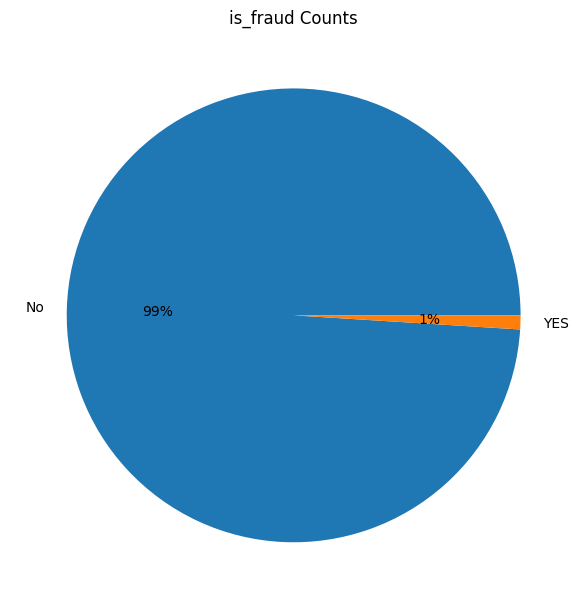

In [ ]:
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## **Train Model**

In [ ]:
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]

In [ ]:
model = SVC()

In [ ]:
model.fit(X, Y)

SVC()

In [ ]:
model.score(X, Y)

0.9900802568218299

## **Testing Model**

In [42]:
test_data = pd.read_csv("/content/fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19461,19461,2020-06-28 07:36:45,3560697798177746,fraud_Bogisich Inc,grocery_pos,78.75,Matthew,Young,M,8840 Miller Port Suite 645,...,33.7163,-116.3381,4677.0,Learning mentor,1955-05-06,5b9babebb238635c76ea3a4d159469ef,1.372405e+09,34.640187,-116.625076,0.0
19462,19462,2020-06-28 07:36:58,30153452207526,fraud_Denesik and Sons,shopping_pos,12.09,Robin,Smith,F,0537 Margaret Common Suite 526,...,31.8287,-99.4270,5908.0,Radio producer,1962-04-05,7e9ab5b23935afc5bdd630e41ec8301e,1.372405e+09,31.661750,-98.635733,0.0
19463,19463,2020-06-28 07:37:59,4792627764422477317,fraud_Rodriguez Group,gas_transport,74.11,Margaret,Mendez,F,7952 Karen Pike,...,38.9462,-94.9714,5760.0,Chief Executive Officer,1978-10-01,8d039792a92be0388a223173bde69a8f,1.372405e+09,38.486031,-95.101789,0.0
19464,19464,2020-06-28 07:38:04,3568255211412877,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,75.82,Timothy,Gomez,M,707 Anthony Causeway,...,41.2249,-85.0301,5341.0,Biomedical engineer,1994-11-24,cc5305c9b90e2e8512a98f3ef43a5601,1.372405e+09,42.035201,-85.267221,0.0


In [43]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497.0,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302.0,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496.0,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767.0,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126.0,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19461,fraud_Bogisich Inc,grocery_pos,78.75,M,33.7163,-116.3381,4677.0,Learning mentor,1.372405e+09,34.640187,-116.625076,0.0
19462,fraud_Denesik and Sons,shopping_pos,12.09,F,31.8287,-99.4270,5908.0,Radio producer,1.372405e+09,31.661750,-98.635733,0.0
19463,fraud_Rodriguez Group,gas_transport,74.11,F,38.9462,-94.9714,5760.0,Chief Executive Officer,1.372405e+09,38.486031,-95.101789,0.0
19464,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,75.82,M,41.2249,-85.0301,5341.0,Biomedical engineer,1.372405e+09,42.035201,-85.267221,0.0


In [44]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [45]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497.0,274,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302.0,390,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496.0,258,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767.0,405,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126.0,195,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19461,64,4,78.75,1,33.7163,-116.3381,4677.0,252,1.372405e+09,34.640187,-116.625076,0.0
19462,131,12,12.09,0,31.8287,-99.4270,5908.0,371,1.372405e+09,31.661750,-98.635733,0.0
19463,522,2,74.11,0,38.9462,-94.9714,5760.0,69,1.372405e+09,38.486031,-95.101789,0.0
19464,153,2,75.82,1,41.2249,-85.0301,5341.0,44,1.372405e+09,42.035201,-85.267221,0.0


In [50]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]
X_test = X_test.dropna()

In [51]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])